In [1]:
import numpy as np
import pandas as pd
import torch
import keras
import os, gc, pathlib
from sklearn.metrics import confusion_matrix
from fastai import *
from fastai.vision.all import *
from fastai.tabular.all import *
from fastai.text.all import *
from fastai.medical.imaging import *
from fastai.vision.data import ImageDataLoaders
from fastai.vision.models import *
import torchvision.models as models
from fastai.callback.schedule import lr_find
from fastai.callback.schedule import *
from matplotlib import pyplot as plt
from fastai.imports import *
from fastai.torch_core import *
from fastai.learner import *

In [2]:
print(os.listdir("D:\Sw\Python_project\Brain_Tumor"))
DATA_DIR = "D:\\Sw\\Python_project\\Brain_Tumor\\brain_tumor"
os.listdir(f'{DATA_DIR}')

['brain_tumor', 'no', 'pred', 'yes']


['no', 'yes']

In [5]:
data = ImageDataLoaders.from_folder(DATA_DIR, train=".", 
                                    valid_pct=0.2,
                                    ds_tfms=aug_transforms(mult=1.0, do_flip=True, flip_vert=True, 
                                    max_warp=0, max_rotate=10.0, 
                                    max_zoom=1.1, max_lighting=0.2,
                                    p_affine=0.75, mode='bilinear',
                                    pad_mode='reflection',
                                    align_corners=True, min_scale=1.0),
                                    item_tfms=Resize(224),
                                    bs=32,
                                    val_bs=None,
                                    num_workers=0,
                                    batch_tfms=Normalize.from_stats(*imagenet_stats))

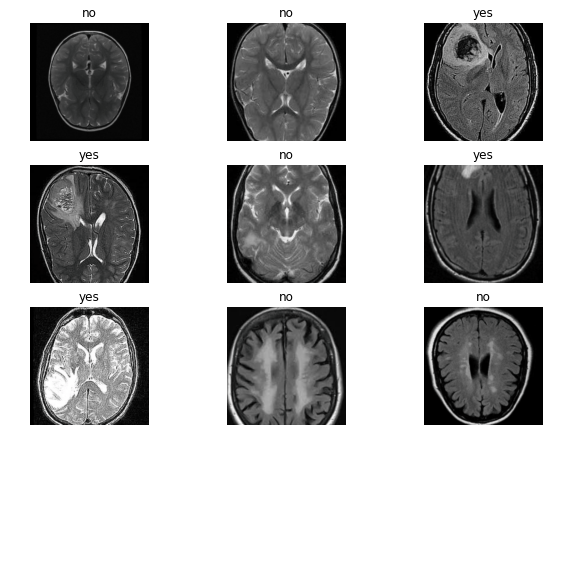

In [13]:
# print(f'Classes: \n {data.classes}')
data.show_batch(nrows=4, figsize=(10,10))

In [14]:
learner = cnn_learner(data, models.vgg16, metrics=[accuracy, error_rate], cbs=[ShowGraphCallback()], model_dir="D:\Sw\Python_project\model")

In [15]:
learner.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): M

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=1.9054607491852948e-06)

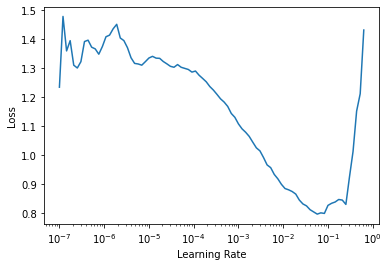

In [16]:
learner.lr_find()

In [17]:
learner.save('D:\Sw\Python_project\working\stage_final1')

Path('D:/Sw/Python_project/working/stage_final1.pth')

In [18]:
learner.load('D:\Sw\Python_project\working\stage_final1')

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.652572,0.200182,0.918333,0.081667,04:46
1,0.325572,0.108185,0.958333,0.041667,04:41
2,0.184448,0.094483,0.963333,0.036667,04:42
3,0.135027,0.071250,0.976667,0.023333,04:41
4,0.106041,0.062914,0.973333,0.026667,04:43
5,0.090765,0.062323,0.976667,0.023333,04:40


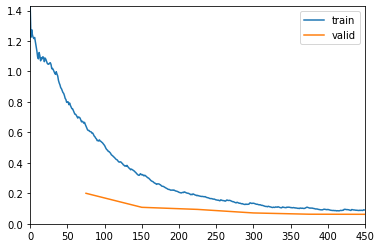

In [19]:
learner.fit_one_cycle(6, lr_max=slice(1e-3), cbs=[ShowGraphCallback()])

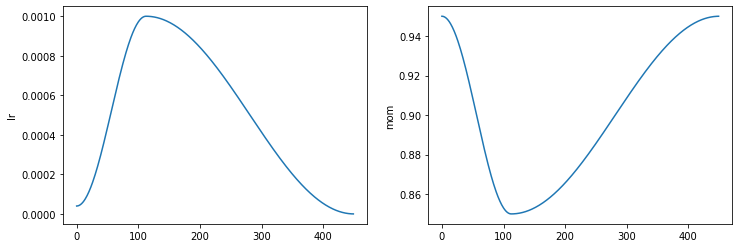

In [20]:
learner.cbs[1].plot_sched()

In [21]:
learner.save('D:\Sw\Python_project\working\stage_final1')

Path('D:/Sw/Python_project/working/stage_final1.pth')

In [34]:
learner.load('D:\Sw\Python_project\working\stage_final1')

In [35]:
learner.unfreeze()

SuggestedLRs(lr_min=7.585775892948732e-06, lr_steep=9.12010818865383e-07)

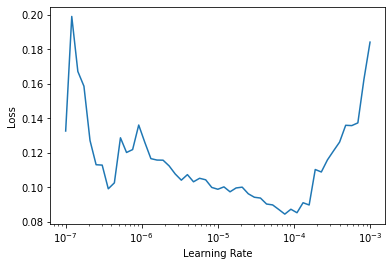

In [24]:
learner.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.072454,0.051468,0.981667,0.018333,12:24
1,0.068974,0.051649,0.981667,0.018333,12:22
2,0.060017,0.030055,0.991667,0.008333,12:23
3,0.045573,0.031848,0.990000,0.010000,12:22
4,0.043513,0.036434,0.988333,0.011667,12:25
5,0.040663,0.032977,0.988333,0.011667,12:24


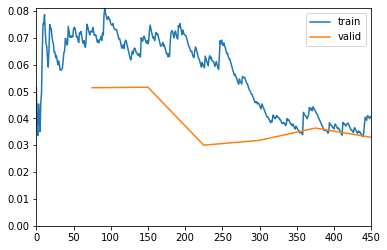

In [36]:
learner.fit_one_cycle(6, lr_max=slice(5.5e-05), cbs=[ShowGraphCallback()])

In [37]:
learner.save('D:\Sw\Python_project\working\stage_final1111')

Path('D:/Sw/Python_project/working/stage_final1111.pth')

In [38]:
interp = ClassificationInterpretation.from_learner(learner)

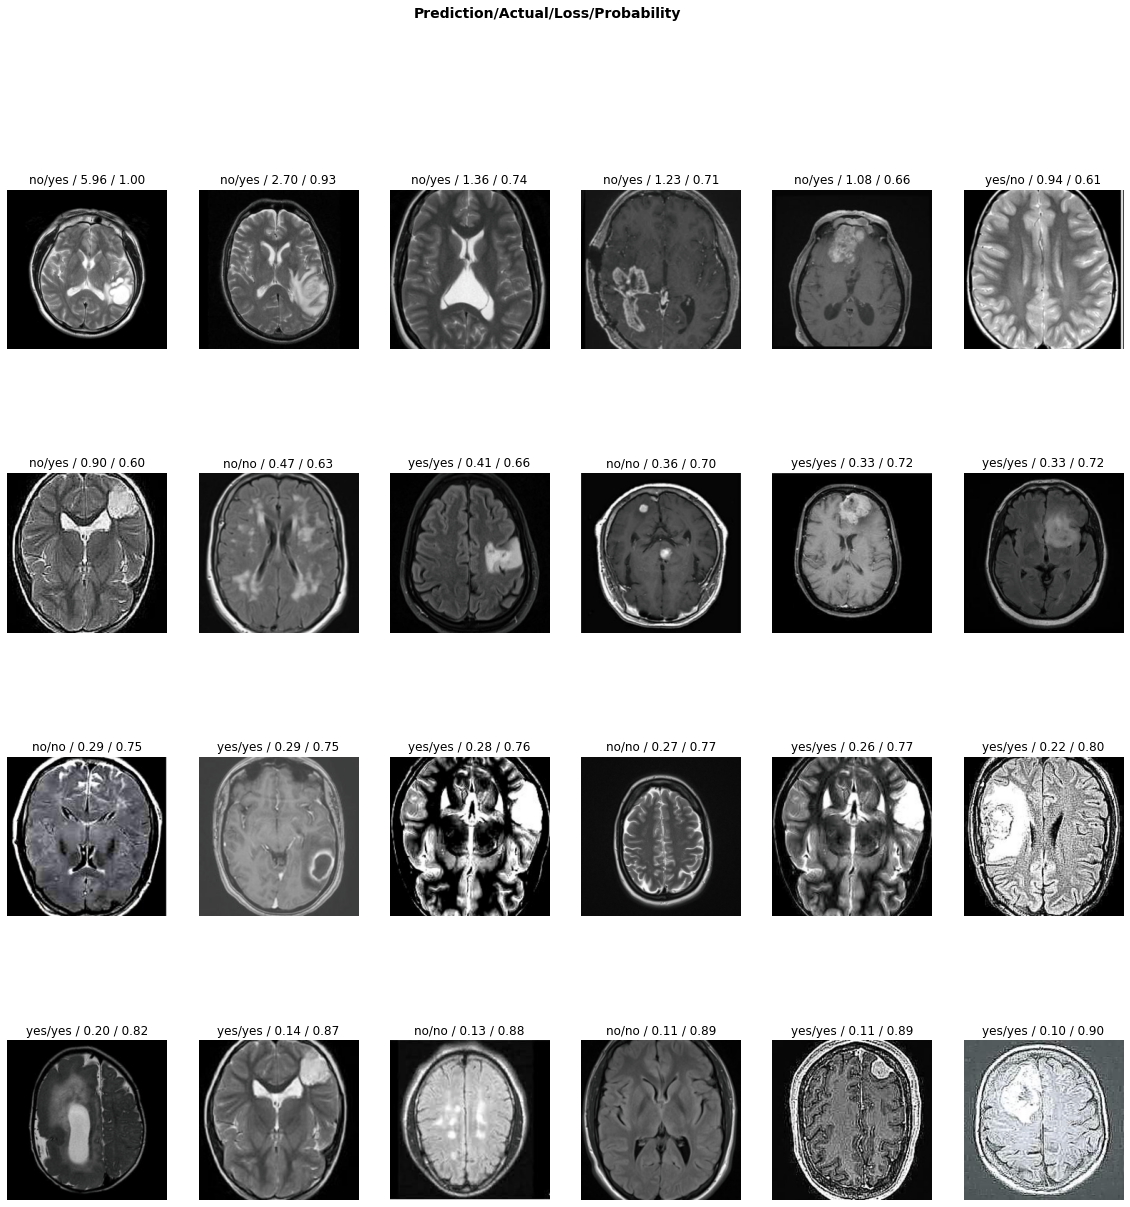

In [39]:
interp.plot_top_losses(24, figsize=(20,20))

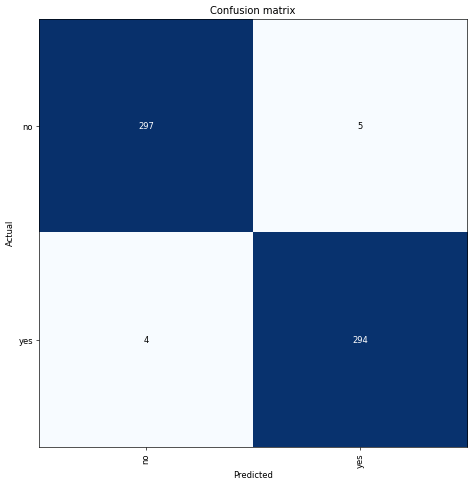

In [33]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)